# **Data dictionary:**

1. `id`: A unique identifier for each flight record in the dataset.
2. `year`: The year in which the flight took place (2013 in this dataset).
3. `month`: The month in which the flight took place (1 to 12).
4. `day`: The day of the month on which the flight took place (1 to 31).
5. `dep_time`: The actual local departure time of the flight, in 24-hour format (hhmm).
6. `sched_dep_time`: The scheduled local departure time of the flight, in 24-hour format (hhmm).
7. `dep_delay`: The difference between the actual and scheduled departure times of the flight, in minutes. A positive value indicates a delayed departure, while a negative value indicates an early departure.
8. `arr_time`: The actual local arrival time of the flight, in 24-hour format (hhmm).
9. `sched_arr_time`: The scheduled local arrival time of the flight, in 24-hour format (hhmm).
10. `arr_delay`: The difference between the actual and scheduled arrival times of the flight, in minutes. A positive value indicates a delayed arrival, while a negative value indicates an early arrival.
11. `carrier`: The two-letter code of the airline carrier for the flight.
12. `flight`: The flight number of the flight.
13. `tailnum`: The unique identifier of the aircraft used for the flight.
14. `origin`: The three-letter code of the airport of origin for the flight.
15. `dest`: The three-letter code of the destination airport for the flight.
16. `air_time`: The duration of the flight, in minutes.
17. `distance`: The distance between the origin and destination airports, in miles.
18. `hour`: The hour component of the scheduled departure time, in local time.
19. `minute`: The minute component of the scheduled departure time, in local time.
20. `time_hour`: The scheduled departure time of the flight, in local time and format (yyyy-mm-dd hh:mm:ss).
21. `name`: The name of the airline carrier for the flight.

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

# **Loading Datset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Filoger/tamrin_quera/ML/Data Visualization/flights.csv")

# **Data Overview**

In [3]:
df.columns

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

In [4]:
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [5]:
df.tail()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air
336775,336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,...,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00,Envoy Air


In [6]:
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of rows: {cols}")

Number of rows: 336776
Number of rows: 21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [8]:
df.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168387.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,0.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84193.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168387.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252581.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336775.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [9]:
df.describe(include="object")

,carrier,tailnum,origin,dest,time_hour,name
count,336776,334264,336776,336776,336776,336776
unique,16,4043,3,105,6936,16
top,UA,N725MQ,EWR,ORD,2013-09-13 08:00:00,United Air Lines Inc.
freq,58665,575,120835,17283,94,58665


In [26]:
df.nunique()

id                336776
year                   1
month                 12
day                   31
dep_time            1318
sched_dep_time      1021
dep_delay            527
arr_time            1411
sched_arr_time      1163
arr_delay            577
carrier               16
flight              3844
tailnum             4043
origin                 3
dest                 105
air_time             509
distance             214
hour                  20
minute                60
time_hour           6936
name                  16
date                 365
dtype: int64

In [10]:
df.isna().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

# **EDA**

In [27]:
df.corr(numeric_only=True)

,id,year,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
id,1.000000,NaN,0.087852,0.002172,0.004076,0.049713,-0.024680,-0.013373,0.018613,0.002676,-0.032866,0.012526,0.003150,0.022619
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,0.087852,NaN,1.000000,-0.000467,-0.000014,0.000420,-0.005537,-0.002403,-0.000319,-0.001791,0.002236,0.003041,-0.000055,0.000987
dep_time,0.002172,NaN,-0.000467,1.000000,0.954617,0.260231,0.660779,0.784682,0.232306,0.041957,-0.014619,-0.013998,0.953306,0.091577
sched_dep_time,0.004076,NaN,-0.000014,0.954617,1.000000,0.198887,0.642680,0.783342,0.173896,0.036495,-0.015532,-0.017995,0.999148,0.082960
dep_delay,0.049713,NaN,0.000420,0.260231,0.198887,1.000000,0.028729,0.160488,0.914803,0.054734,-0.022405,-0.021671,0.198226,0.028441
arr_time,-0.024680,NaN,-0.005537,0.660779,0.642680,0.028729,1.000000,0.788997,0.024482,0.025042,0.054296,0.046991,0.642651,0.040969
sched_arr_time,-0.013373,NaN,-0.002403,0.784682,0.783342,0.160488,0.788997,1.000000,0.133261,0.021594,0.078918,0.068726,0.783283,0.050321
arr_delay,0.018613,NaN,-0.000319,0.232306,0.173896,0.914803,0.024482,0.133261,1.000000,0.072862,-0.035297,-0.061868,0.173456,0.021522
flight,0.002676,NaN,-0.001791,0.041957,0.036495,0.054734,0.025042,0.021594,0.072862,1.000000,-0.472838,-0.484165,0.035838,0.018137


<Axes: >

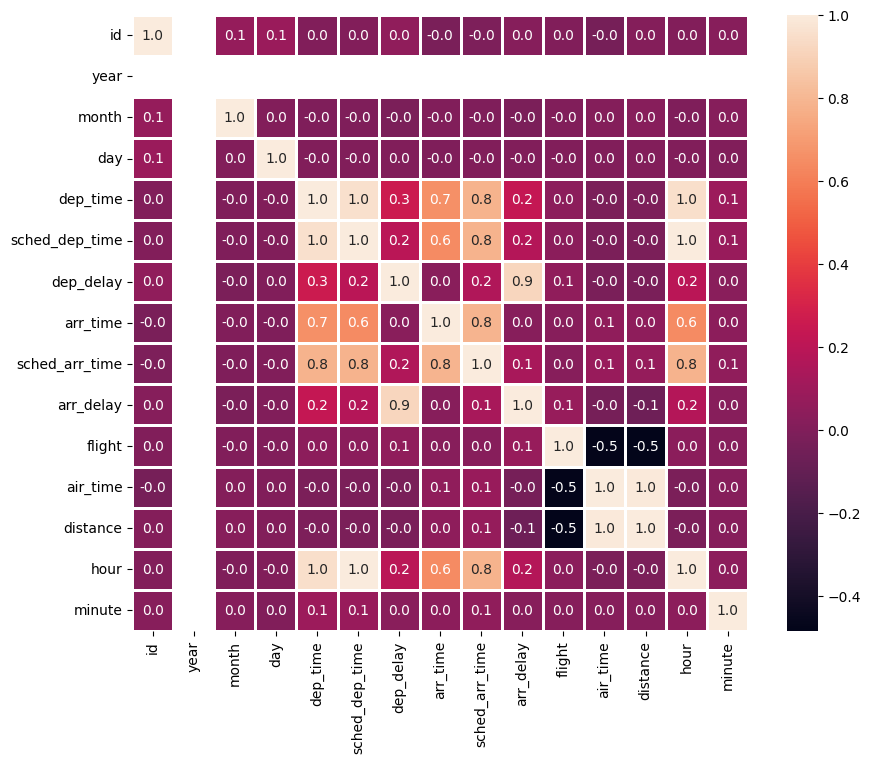

In [13]:
# sns.set(rc = {'figure.figsize':(15,8)})
fig = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=2, square=True, fmt=".1f")



*   arr_delay
*   dep_delay

**We notice that these two columns have a positive relationship**



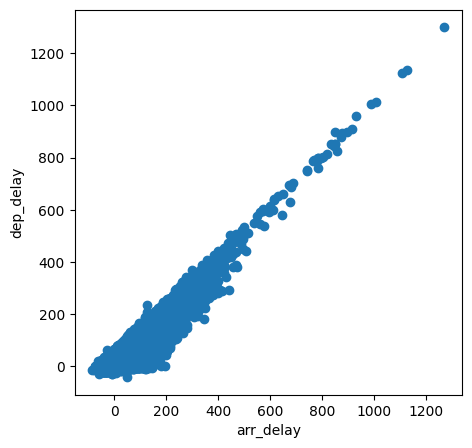

In [14]:
fig , ax = plt.subplots(figsize=(5, 5))
plt.scatter(x=df["arr_delay"], y=df["dep_delay"])

ax.set(
    xlabel="arr_delay",
    ylabel="dep_delay"
);

**The longer the delay in movement, the greater the delay in arrival, and they have a positive relationship**

## **Distribution chart of numerical column values**

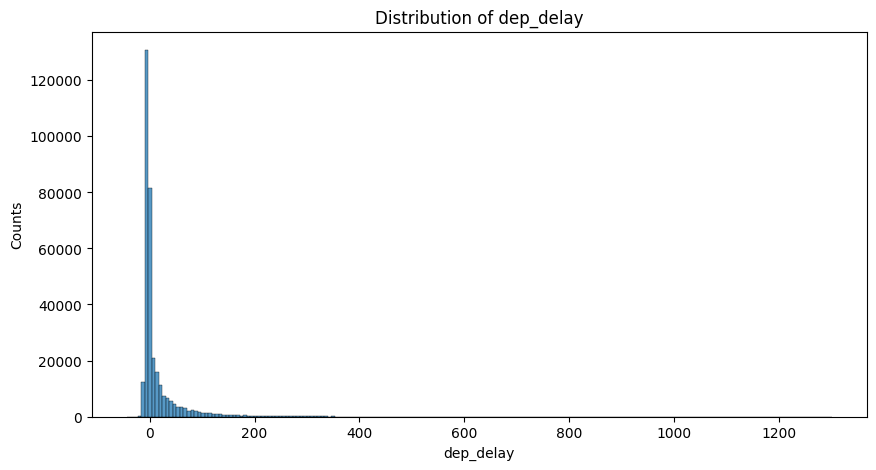

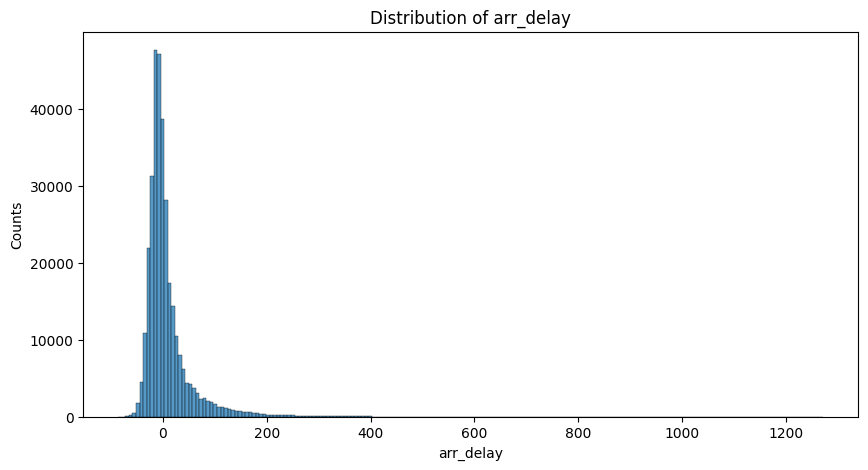

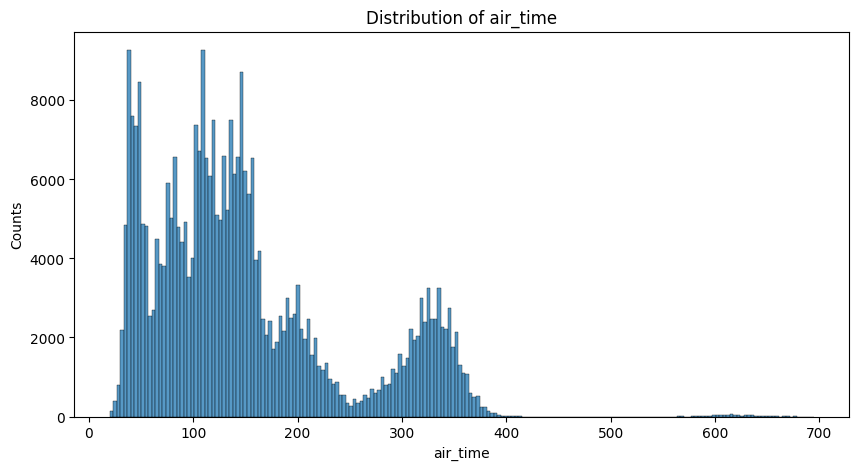

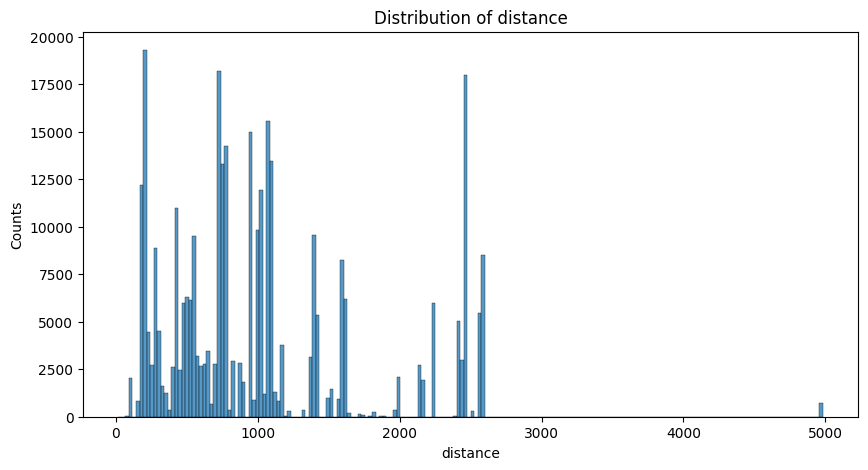

In [29]:
numerical_columns = ['dep_delay' , 'arr_delay' , 'air_time' , 'distance']

for column in numerical_columns:

    plt.figure(figsize=(10,5))
    sns.histplot(data=df , x=column , bins=200)
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.title(f'Distribution of {column}')

## **A diagram of the relationship between numerical variables**

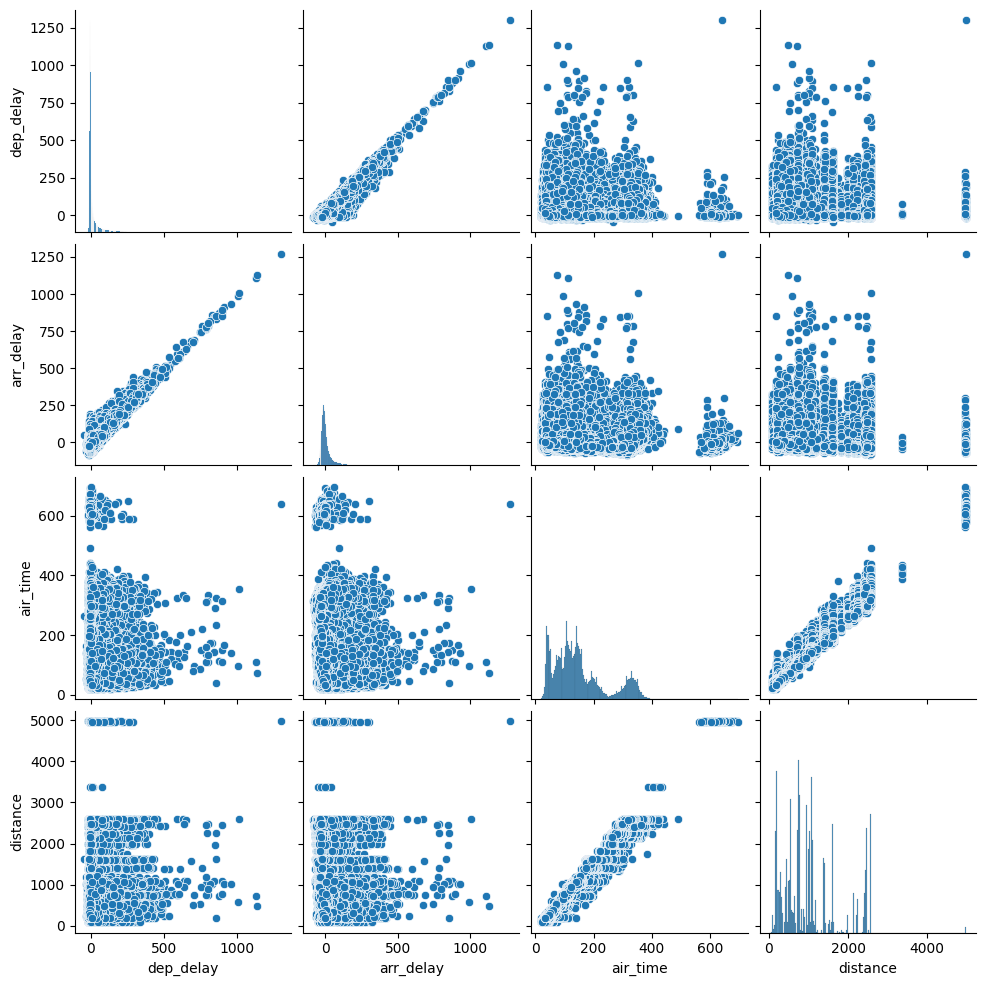

In [16]:
numerical_columns = ['dep_delay' , 'arr_delay' , 'air_time' , 'distance']
sns.pairplot(df , vars=numerical_columns)

## **View the number of flights each month**

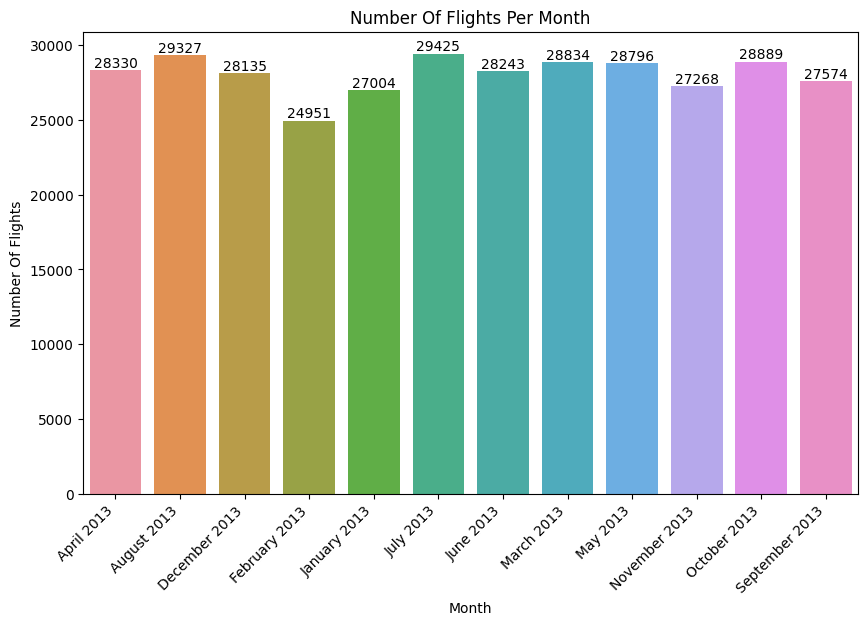

In [17]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Group flights by month and count the number of flights per month
flights_per_month = df.groupby(df['date'].dt.strftime('%B %Y'))['id'].count().reset_index()
flights_per_month.rename(columns={'date': 'Month', 'id': 'Number of flights'}, inplace=True)

# Create a bar plot of the number of flights per month
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Month', y='Number of flights', data=flights_per_month)
ax.bar_label(ax.containers[0])

plt.title('Number Of Flights Per Month')
plt.xlabel('Month')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number Of Flights');

## **Viewing the number of flights that were delayed in what month and day**

In [18]:
flights_per_month = df.groupby(df['date'].dt.strftime('%Y-%B-%d'))['dep_delay'].sum().reset_index()
flights_per_month

,date,dep_delay
0,2013-April-01,11937.0
1,2013-April-02,8095.0
2,2013-April-03,3418.0
3,2013-April-04,6824.0
4,2013-April-05,5787.0
...,...,...
360,2013-September-26,2353.0
361,2013-September-27,3588.0
362,2013-September-28,477.0
363,2013-September-29,5248.0


Text(0.5, 1.0, 'The number of flights that were delayed in each day')

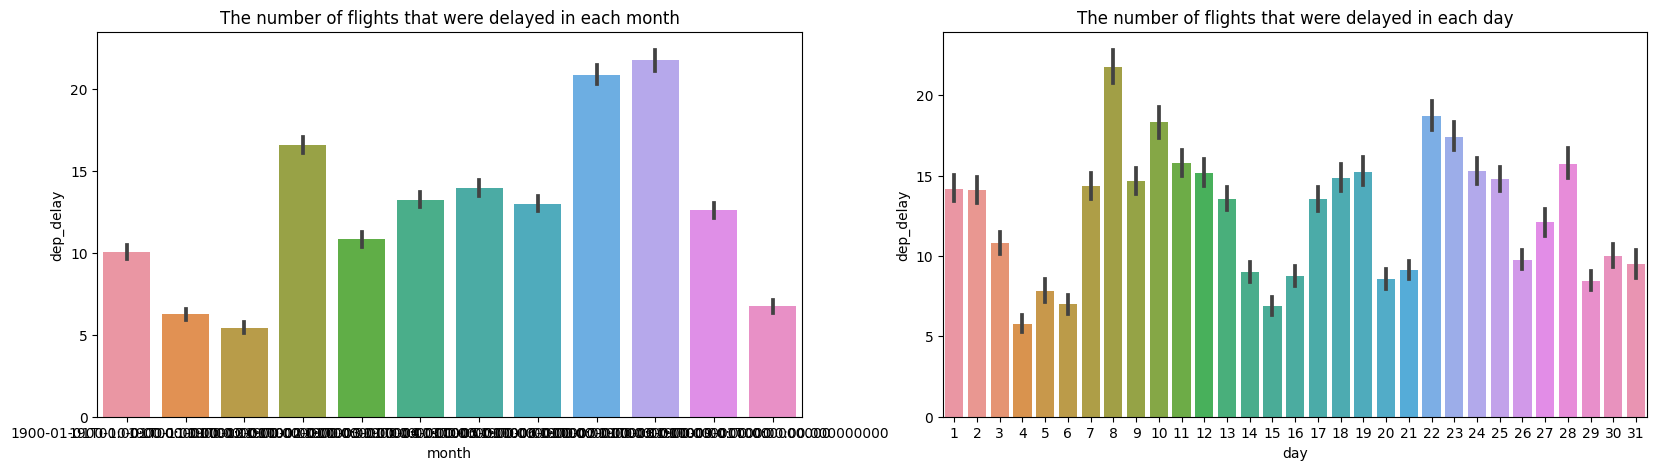

In [25]:
fig , ax = plt.subplots(1,2, figsize=(20,5))
sns.barplot(data=df, x="month", y="dep_delay", ax=ax[0])
sns.barplot(data=df, x="day", y="dep_delay", ax=ax[1])

ax[0].set_title("The number of flights that were delayed in each month")
ax[1].set_title("The number of flights that were delayed in each day")




*   **In months 6 and 7, we had the longest delay in arriving flights**
*   **On the 8, 10, 22, 23 the flights were delayed the most**



## **Viewing the airlines that had the most flights**

In [20]:
df.groupby("name")["id"].count().sort_values(ascending=False)

name
United Air Lines Inc.          58665
JetBlue Airways                54635
ExpressJet Airlines Inc.       54173
Delta Air Lines Inc.           48110
American Airlines Inc.         32729
Envoy Air                      26397
US Airways Inc.                20536
Endeavor Air Inc.              18460
Southwest Airlines Co.         12275
Virgin America                  5162
AirTran Airways Corporation     3260
Alaska Airlines Inc.             714
Frontier Airlines Inc.           685
Mesa Airlines Inc.               601
Hawaiian Airlines Inc.           342
SkyWest Airlines Inc.             32
Name: id, dtype: int64

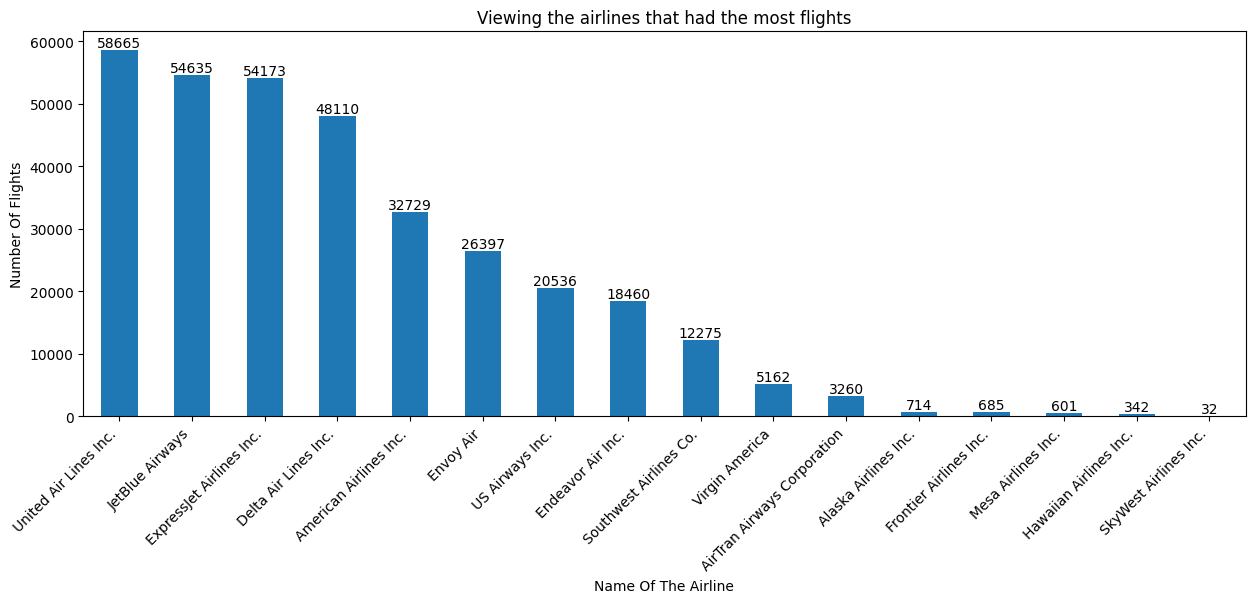

In [21]:
plt.figure(figsize=(15, 5))

ax = df.groupby("name")["id"].count().sort_values(ascending=False).plot(
    kind="bar"
)

plt.title("Viewing the airlines that had the most flights")
# plt.xticks(rotation=45)
plt.xlabel("Name Of The Airline")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number Of Flights")
ax.bar_label(ax.containers[0], fontsize=10);

**Most flights for United Air Lines Inc**

## **Checking delays by airline**

<ipython-input-22-3b000dad62ba>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  delays_per_carrier = df.groupby('name')['dep_delay', 'arr_delay'].sum().reset_index()


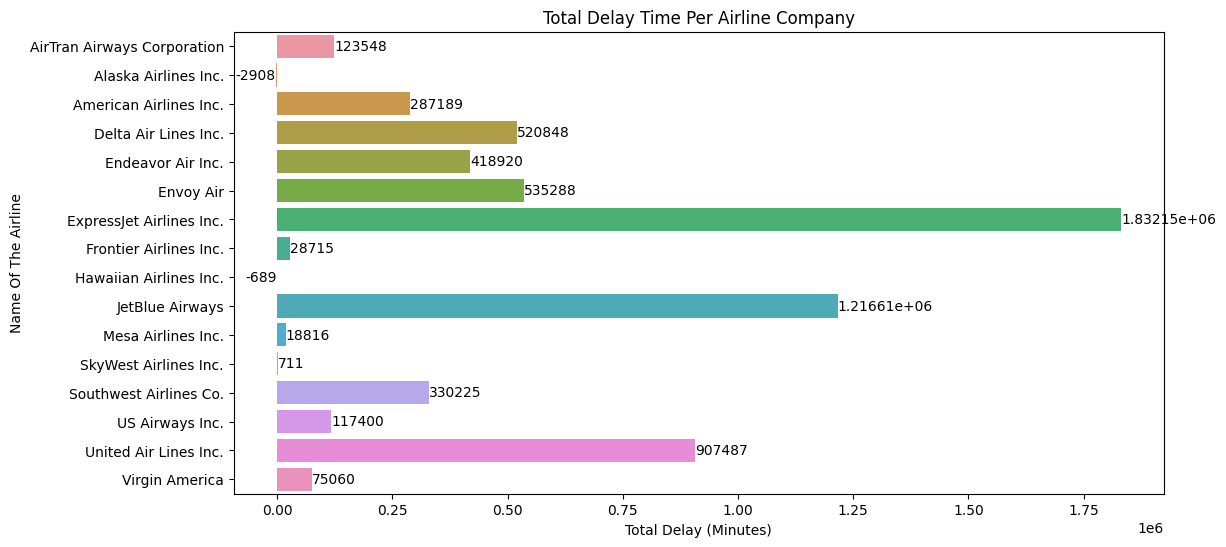

In [22]:
delays_per_carrier = df.groupby('name')['dep_delay', 'arr_delay'].sum().reset_index()
delays_per_carrier['total_delay'] = delays_per_carrier['dep_delay'] + delays_per_carrier['arr_delay']
delays_per_carrier = delays_per_carrier[['name', 'total_delay']]

# Create a bar plot of the total delay time per carrier
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='total_delay', y='name', data=delays_per_carrier)
ax.bar_label(ax.containers[0])

plt.title('Total Delay Time Per Airline Company')
plt.xlabel('Total Delay (Minutes)')
#plt.xticks(rotation=90)
plt.ylabel('Name Of The Airline');



**More delays for ExpressJet Airlines Inc Airlines**

## **Check for delays throughout the day**

<ipython-input-23-e59744551a7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays_per_hour['hour'] = delays_per_hour['dep_time'] // 100
<ipython-input-23-e59744551a7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays_per_hour['total_delay'] = delays_per_hour['dep_delay'] + delays_per_hour['arr_delay']


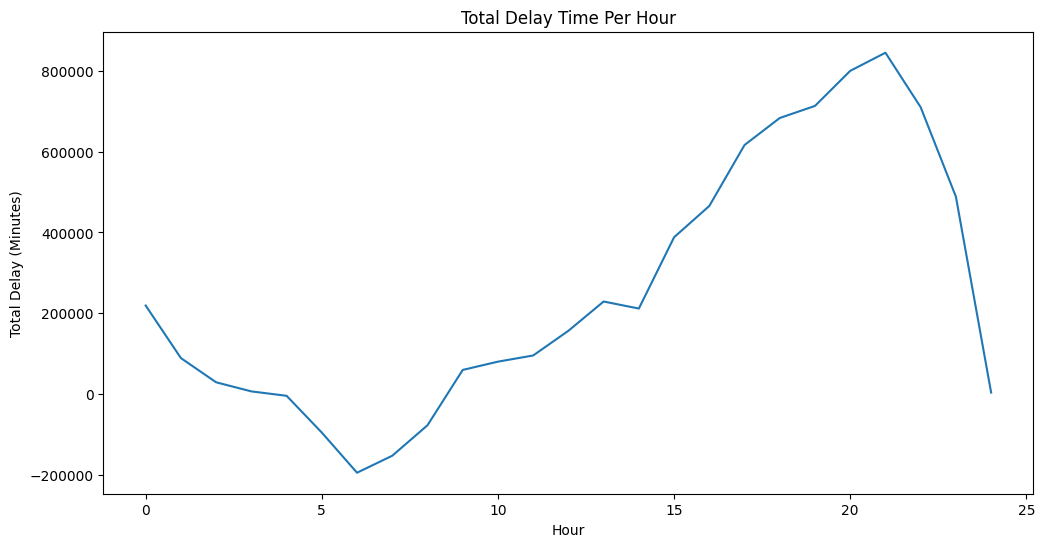

In [23]:
delays_per_hour = df[['dep_time', 'dep_delay', 'arr_delay']]
delays_per_hour['hour'] = delays_per_hour['dep_time'] // 100
delays_per_hour['total_delay'] = delays_per_hour['dep_delay'] + delays_per_hour['arr_delay']
delays_per_hour = delays_per_hour.groupby('hour')['total_delay'].sum().reset_index()

# Create a line plot of the total delay time per hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='total_delay', data=delays_per_hour)

plt.title('Total Delay Time Per Hour')
plt.xlabel('Hour')
plt.ylabel('Total Delay (Minutes)');

* **The most delays were from 15:00 to 23:00**
* **The closer we get to the end of the night, the longer the flight delays**